1. Problem statement (Business problem understanding)
    - Find student's performance based on different parameters like Gender, Ethinicity,Parental level of education, Lunch, test preparation,etc.

2. Data collection 
    - Dataset consists of 1000 rows and 8 columns

2.1 Import the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("student.csv")

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

3. Data Understanding
    - check for missing value
    - check for duplicates
    - check the datatype
    - check the unique values
    - basic descriptive statistics of the data
    - Categories present in categorical columns

In [11]:
#3.1 Check for missing values

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
#3.2 check for duplicates
df.duplicated().sum()

0

In [13]:
#3.3 check for datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
#3.4 check for number of unique values in each variable

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
#3.5 Basic descriptive statistics of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
for i in list(df.keys()):
    print("Categories in "+i+" variable are :",end ="    ")
    print(df[i].unique())

Categories in gender variable are :    ['female' 'male']
Categories in race_ethnicity variable are :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable are :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable are :    ['standard' 'free/reduced']
Categories in test_preparation_course variable are :    ['none' 'completed']
Categories in math_score variable are :    [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in reading_score variable are :    [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  8

In [28]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype =="O"]

print("Number of numerical features = {} & they are: {}".format(len(numerical_features),numerical_features))
print("Number of categorical features = {} & they are: {}".format(len(categorical_features),categorical_features))

Number of numerical features = 3 & they are: ['math_score', 'reading_score', 'writing_score']
Number of categorical features = 5 & they are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [29]:
df["Total_Score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average_score"] = df["Total_Score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
Reading_full = df[df["reading_score"] == 100]["Average_score"].count()
Maths_full = df[df["math_score"] == 100]["Average_score"].count()
Writing_full = df[df["writing_score"] == 100]["Average_score"].count()

print("Students with full marks in Maths:", Maths_full)
print("Students with full marks in reading:", Reading_full)
print("Students with full marks in writing:", Writing_full)

Students with full marks in Maths: 7
Students with full marks in reading: 17
Students with full marks in writing: 14


In [37]:
Reading_less = df[df["reading_score"] <= 20]["Average_score"].count()
Maths_less= df[df["math_score"] <= 20]["Average_score"].count()
Writing_less = df[df["writing_score"] <= 20]["Average_score"].count()

print("Students with full marks in Maths:", Maths_less)
print("Students with full marks in reading:", Reading_less)
print("Students with full marks in writing:", Writing_less)

Students with full marks in Maths: 4
Students with full marks in reading: 1
Students with full marks in writing: 3


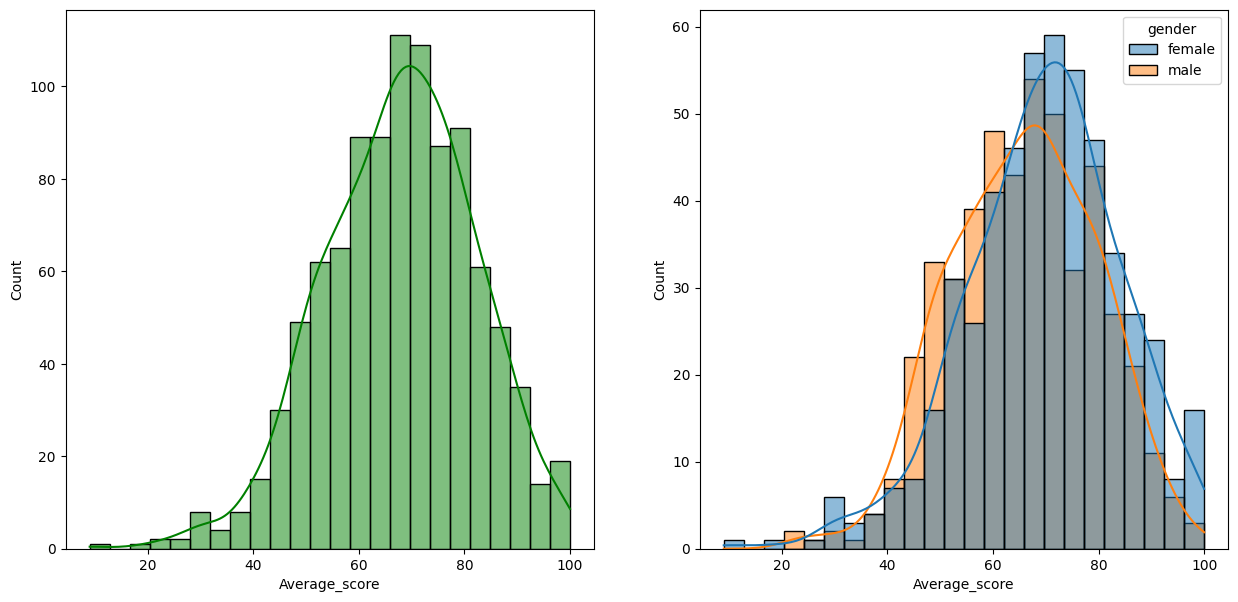

In [39]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(df["Average_score"],kde = True,color = "g")
plt.subplot(122)
sns.histplot(x = df["Average_score"],kde = True,hue = df["gender"])
plt.show()

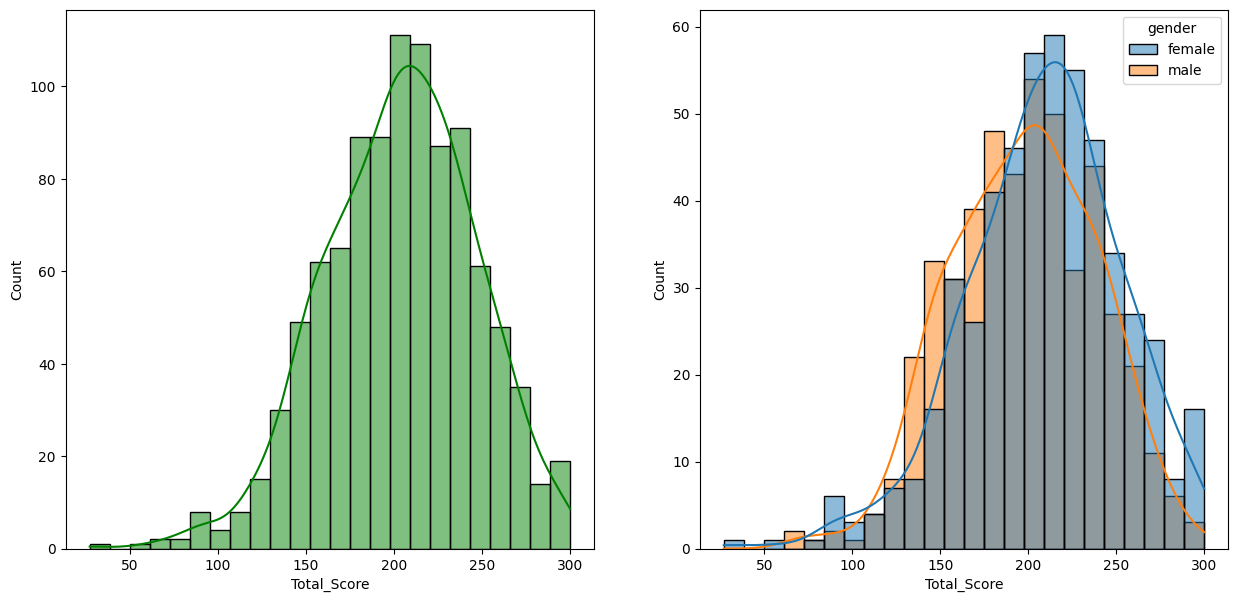

In [40]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(df["Total_Score"],kde = True,color = "g")
plt.subplot(122)
sns.histplot(x = df["Total_Score"],kde = True,hue = df["gender"])
plt.show()